In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Load Images

In [5]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(folder)
    class_indices = {class_name: i for i, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(class_indices[class_name])
    
    return np.array(images), np.array(labels), class_names

# Load dataset
data_dir = r"D:\flowers"  # Update this path
X, y, class_names = load_images_from_folder(data_dir)
X = X / 255.0  # Normalize images
y = to_categorical(y)  # One-hot encode labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<!-- def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(folder)
    class_indices = {class_name: i for i, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(class_indices[class_name])
    
    return np.array(images), np.array(labels), class_names

# Load dataset
data_dir = r"D:\flowers"
X, y, class_names = load_images_from_folder(data_dir)
X = X / 255.0  # Normalize images
y = to_categorical(y)  # One-hot encode labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 -->

In [18]:
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Model Building
Build the CNN Model

<!-- model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
 -->

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')  # Update number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)       

# Model Training

<!-- datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=30, 
                    validation_data=(X_test, y_test))
 -->

In [8]:
# Train the model


# Train model
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/30


108/108 [==============================] - 24s 176ms/step - loss: 1.4193 - accuracy: 0.3458 - val_loss: 1.2445 - val_accuracy: 0.4583
Epoch 2/30
108/108 [==============================] - 18s 170ms/step - loss: 1.1752 - accuracy: 0.4842 - val_loss: 1.0521 - val_accuracy: 0.5729
Epoch 3/30
108/108 [==============================] - 18s 170ms/step - loss: 1.0517 - accuracy: 0.5575 - val_loss: 1.1669 - val_accuracy: 0.5000
Epoch 4/30
108/108 [==============================] - 19s 172ms/step - loss: 0.9805 - accuracy: 0.6056 - val_loss: 0.9269 - val_accuracy: 0.6053
Epoch 5/30
108/108 [==============================] - 18s 171ms/step - loss: 0.9313 - accuracy: 0.6276 - val_loss: 1.0834 - val_accuracy: 0.5521
Epoch 6/30
108/108 [==============================] - 18s 167ms/step - loss: 0.8912 - accuracy: 0.6435 - val_loss: 0.8935 - val_accuracy: 0.6539
Epoch 7/30
108/108 [==============================] - 17s 158ms/step - loss: 0.8824 - accuracy: 0.6525 - val_loss: 0.8429 - val_

# Model Evaluation

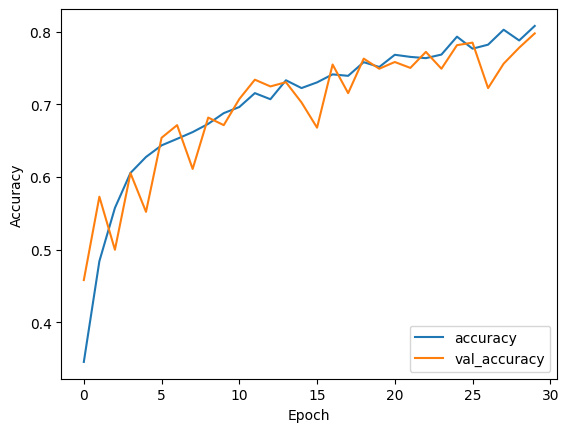

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Evaluate on Test Data

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


27/27 - 1s - loss: 0.6278 - accuracy: 0.7975 - 1s/epoch - 40ms/step

Test accuracy: 0.7974537014961243


# Real-time Video Image Detection

<!-- def preprocess_frame(frame):
    frame = cv2.resize(frame, (64, 64))
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame / 255.0
    return frame

cap = cv2.VideoCapture(0)  # Capture video from webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    processed_frame = preprocess_frame(frame)
    prediction = model.predict(processed_frame)
    class_idx = np.argmax(prediction)
    class_label = class_names[class_idx]

    cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Flower Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
 -->|

In [19]:
def preprocess_frame(frame):
    frame = cv2.resize(frame, (64, 64))
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame / 255.0
    return frame

cap = cv2.VideoCapture(0)  # Capture video from webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    processed_frame = preprocess_frame(frame)
    prediction = model.predict(processed_frame)
    class_idx = np.argmax(prediction)

    # Check if the confidence is above a certain threshold, otherwise say "No Flower"
    confidence = prediction[0][class_idx]
    
    class_label = f"""{class_names[class_idx]} {str(round(confidence,2)*100)[:2]} % """
    
    
    if confidence < 0.6:  # Adjust threshold as needed
        class_label = f"""No Flower {str(round(confidence,2)*100)[:2]} %"""

    cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Flower Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


#  Conclusion
This guide walks you through creating a multi-class classification project for detecting flowers in real-time using OpenCV and a trained CNN model. By following these steps, you will have a working project that detects and classifies flowers from a video stream captured via a webcam.